In [1]:
#  coding=utf-8
%matplotlib inline

In [20]:
import os
import sys
import face_recognition
from PIL import Image
import numpy as np
import matplotlib
print(matplotlib.font_manager.FontProperties().get_family())
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
sys.path.append("..")
from utils.face_recognition import get_img_with_landmarks

['sans-serif']


['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
E:\毕设\代码\my_scripts\data\CK+\anger\S014_003_00000028.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S014_003_00000028_1.png


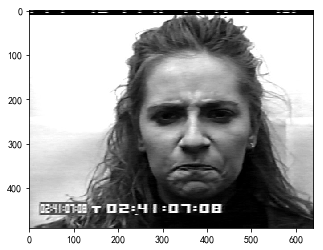

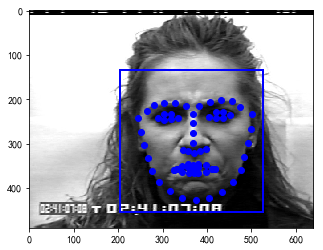

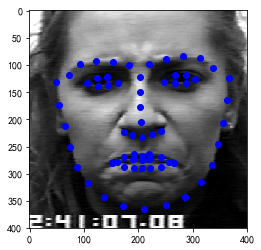

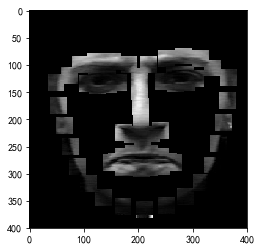

E:\毕设\代码\my_scripts\data\CK+\contempt\S155_002_00000012.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S155_002_00000012_1.png


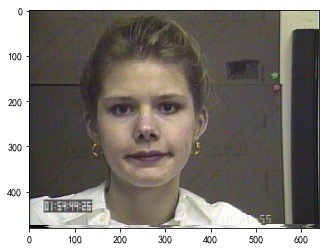

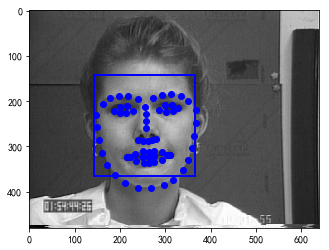

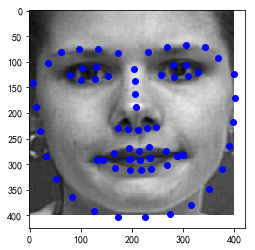

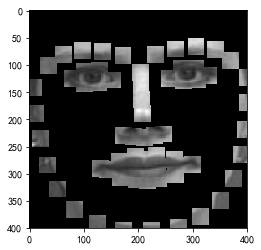

E:\毕设\代码\my_scripts\data\CK+\disgust\S087_004_00000010.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S087_004_00000010_1.png


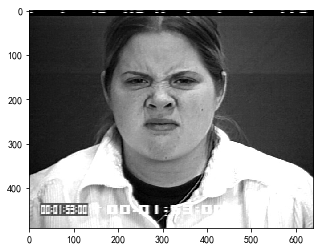

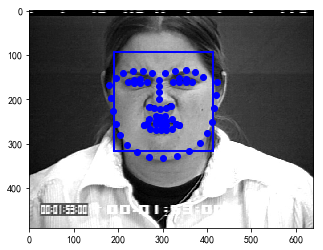

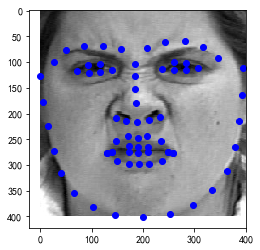

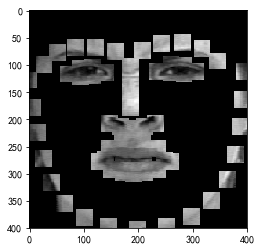

E:\毕设\代码\my_scripts\data\CK+\fear\S125_006_00000022.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S125_006_00000022_1.png


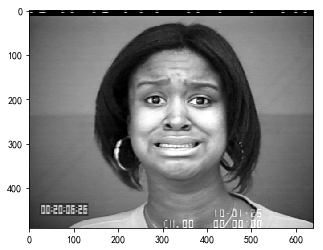

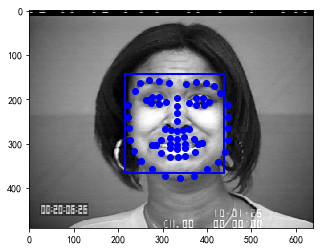

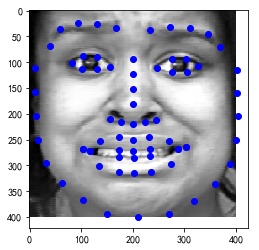

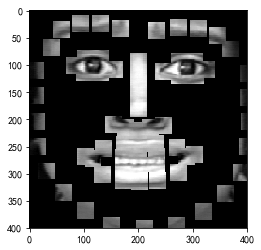

E:\毕设\代码\my_scripts\data\CK+\happy\S129_012_00000009.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S129_012_00000009_1.png


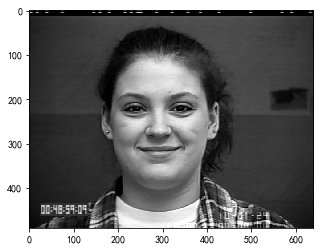

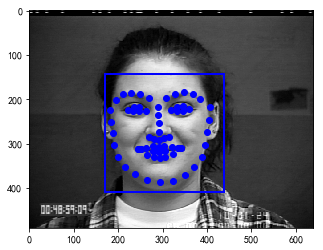

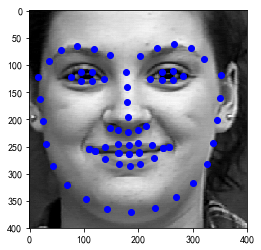

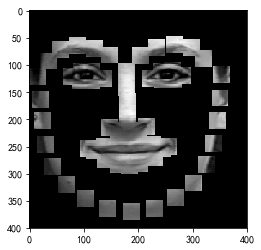

E:\毕设\代码\my_scripts\data\CK+\sadness\S503_006_00000020.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S503_006_00000020_1.png


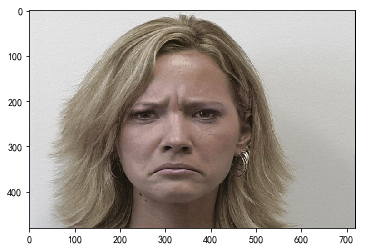

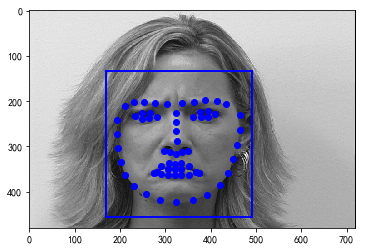

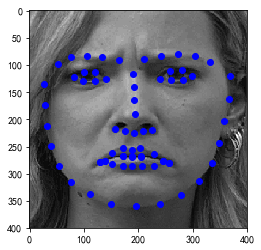

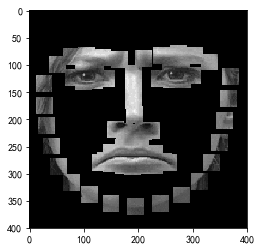

E:\毕设\代码\my_scripts\data\CK+\surprise\S081_001_00000018.png
Saving... E:\毕设\代码\my_scripts\Saved_Virtualizations\test_dataset\S081_001_00000018_1.png


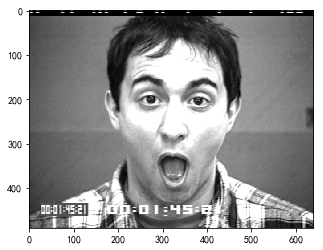

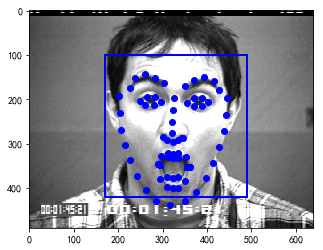

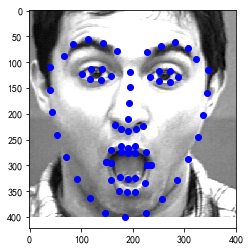

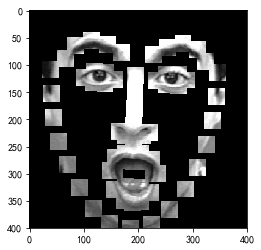

In [43]:
img_dir_pre_path = "E:\毕设\代码\my_scripts\data\CK+"
save_pre_path = "E:\毕设\代码\my_scripts\Saved_Virtualizations"
save_folder = "test_dataset"
if not os.path.exists(save_pre_path):
    os.mkdir(save_pre_path)
if not os.path.exists(os.path.join(save_pre_path, save_folder)):
    os.mkdir(os.path.join(save_pre_path, save_folder))
classes = os.listdir(img_dir_pre_path)
print(classes)
classes_num = len(classes)
img_paths = []
for i in range(classes_num):
    c = classes[i]
    img_file_names = os.listdir(os.path.join(img_dir_pre_path, c))
    index = random.randint(0, len(img_file_names))
    path = os.path.join(img_dir_pre_path, c, img_file_names[index])
    file_name = img_file_names[index].split(".")[0]
    print(path)
    img_paths.append(path)
    img = Image.open(path)
    # 原图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    fig.savefig(os.path.join(save_pre_path, save_folder, file_name+"_1.png"))
    print("Saving...", os.path.join(save_pre_path, save_folder, file_name+"_1.png"))
    # 识别图
    img = img.convert("L")
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    top, right, bottom, left = face_recognition.face_locations(np.array(img))[0]
    face_landmarks = face_recognition.face_landmarks(np.array(img))[0]
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            ax.plot(plot[0], plot[1], 'bo')
    lines = []
    lines.append([(top, top), (left, right)])
    lines.append([(top, bottom), (left, left)])
    lines.append([(top, bottom), (right, right)])
    lines.append([(bottom, bottom), (left, right)])
    for line_ys, line_xs in lines:
        ax.add_line(Line2D(line_xs, line_ys, linewidth=2, color='blue'))
    fig.savefig(os.path.join(save_pre_path, save_folder, file_name+"_2.png"))
    # 剪裁图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            if plot[0] < left:
                left = plot[0]
            if plot[0] > right:
                right = plot[0]
            if plot[1] < top:
                top = plot[1]
            if plot[1] > bottom:
                bottom = plot[1]
    img = img.crop((left, top, right, bottom)).resize((400, 400))
    ax.imshow(np.array(img), cmap="gray")
    face_landmarks = face_recognition.face_landmarks(np.array(img))[0]
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            ax.plot(plot[0], plot[1], 'bo')
    fig.savefig(os.path.join(save_pre_path, save_folder, file_name+"_3.png"))
    # 标记点剪裁图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    img = get_img_with_landmarks(img, face_landmarks)
    ax.imshow(np.array(img), cmap="gray")
    fig.savefig(os.path.join(save_pre_path, save_folder, file_name+"_4.png"))
    
    plt.show()

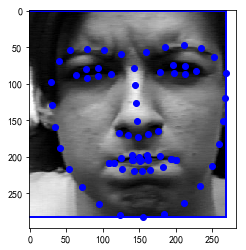

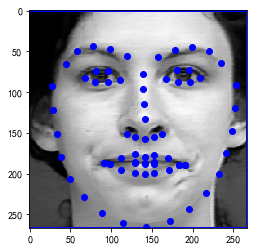

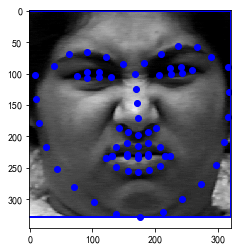

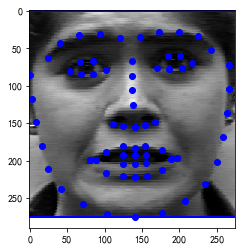

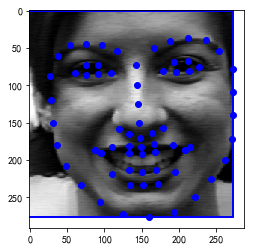

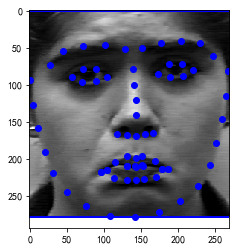

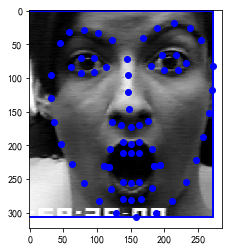

In [40]:
img_dir_pre_path = "E:\毕设\代码\my_scripts\data\CK+"
classes = os.listdir(img_dir_pre_path)
for c in classes:
    img_file_names = os.listdir(os.path.join(img_dir_pre_path, c))
    for img_file_name in img_file_names:
        img = Image.open(os.path.join(img_dir_pre_path, c, img_file_name))
        break
    top, right, bottom, left = face_recognition.face_locations(np.array(img))[0]
    face_landmarks = face_recognition.face_landmarks(np.array(img))[0]
#     print(face_landmarks)
#     print(len(face_landmarks))
#     num = 0
#     for key in face_landmarks.keys():
#         print(key, len(face_landmarks[key]))
#         num += len(face_landmarks[key])
#     print(num)
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            if plot[0] < left:
                left = plot[0]
            if plot[0] > right:
                right = plot[0]
            if plot[1] < top:
                top = plot[1]
            if plot[1] > bottom:
                bottom = plot[1]
    img = img.crop((left, top, right, bottom))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            ax.plot(plot[0]-left, plot[1]-top, 'bo')
    lines = []
    top, right, bottom, left = top-top, right-left, bottom-top, left-right
    lines.append([(top, top), (left, right)])
    lines.append([(top, bottom), (left, left)])
    lines.append([(top, bottom), (right, right)])
    lines.append([(bottom, bottom), (left, right)])
    for line_ys, line_xs in lines:
#         print(line_xs,line_ys)
        ax.add_line(Line2D(line_xs, line_ys, linewidth=2, color='blue'))
    
    
plt.show()

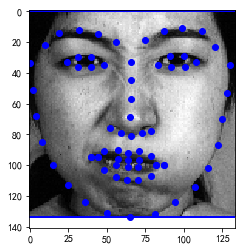

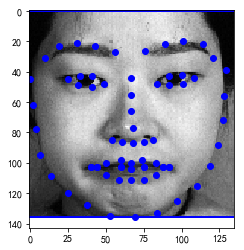

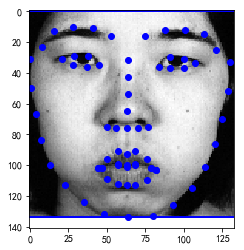

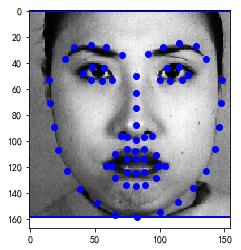

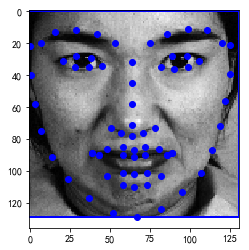

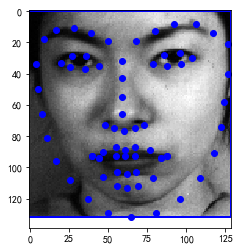

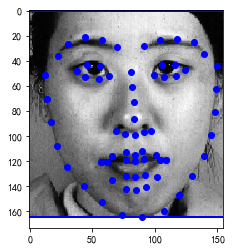

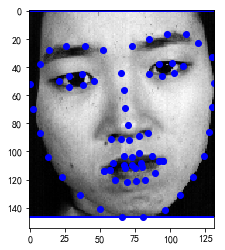

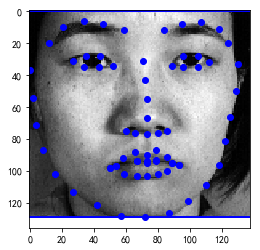

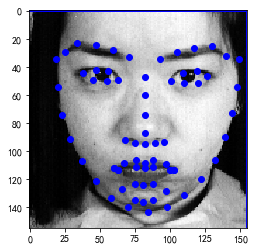

In [4]:
img_dir_pre_path = "E:\毕设\代码\my_scripts\data\jaffe"
person_names = os.listdir(img_dir_pre_path)
for person_name in person_names:
    img_file_names = os.listdir(os.path.join(img_dir_pre_path, person_name))
    for img_file_name in img_file_names:
        img = Image.open(os.path.join(img_dir_pre_path, person_name, img_file_name))
        break
    top, right, bottom, left = face_recognition.face_locations(np.array(img))[0]
    face_landmarks = face_recognition.face_landmarks(np.array(img))[0]
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            if plot[0] < left:
                left = plot[0]
            if plot[0] > right:
                right = plot[0]
            if plot[1] < top:
                top = plot[1]
            if plot[1] > bottom:
                bottom = plot[1]
    img = img.crop((left, top, right, bottom))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.array(img), cmap="gray")
    
    for name, plot_list in face_landmarks.items():
        for plot in plot_list:
            ax.plot(plot[0]-left, plot[1]-top, 'bo')
    lines = []
    top, right, bottom, left = top-top, right-left, bottom-top, left-right
    lines.append([(top, top), (left, right)])
    lines.append([(top, bottom), (left, left)])
    lines.append([(top, bottom), (right, right)])
    lines.append([(bottom, bottom), (left, right)])
    for line_ys, line_xs in lines:
#         print(line_xs,line_ys)
        ax.add_line(Line2D(line_xs, line_ys, linewidth=2, color='blue'))
    
    
plt.show()

以下代码测试将输出转化为条形图
---

In [23]:
output_map = {0: '生气', 1: '恶心', 2: '害怕', 3: '开心', 4: '悲伤', 5: '惊讶', 6: '中性'}
y = [1, 2, 3, 3, 2, 1,0]

def draw_bar_img(output_map, y, save_path="", plt_show=True, log_enabled=True, bar_color=(118/255, 141/255, 50/255, 200/255)):
    """
    绘制条形图像
    :param img: img
    :return: None
    """
    emotions = []
    x = list(output_map.keys())
    x.sort()
    for index in x:
        emotions.append(output_map[index])
    print(x)
    print(y)
    print(emotions)
        
    fig = plt.figure(figsize=(20, 20))  # figsize: width, height in inches
    ax = fig.add_subplot(111)
    ax.set_ylabel("softmax_rate", fontsize=25)
    ax.set_title(u"预测类别概率", fontsize=48)
    ax.bar(range(len(emotions)), y, width = 0.8, align="center", tick_label=emotions, color=bar_color)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(25)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
    if len(save_path) > 0:
        plt.savefig(save_path)
        if log_enabled:
            print("saved fig to %s" % save_path)
    if plt_show:
        plt.show()
    else:
        plt.close('all')

[0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 3, 2, 1, 0]
['生气', '恶心', '害怕', '开心', '悲伤', '惊讶', '中性']
saved fig to ../Saved_Virtualizations/test


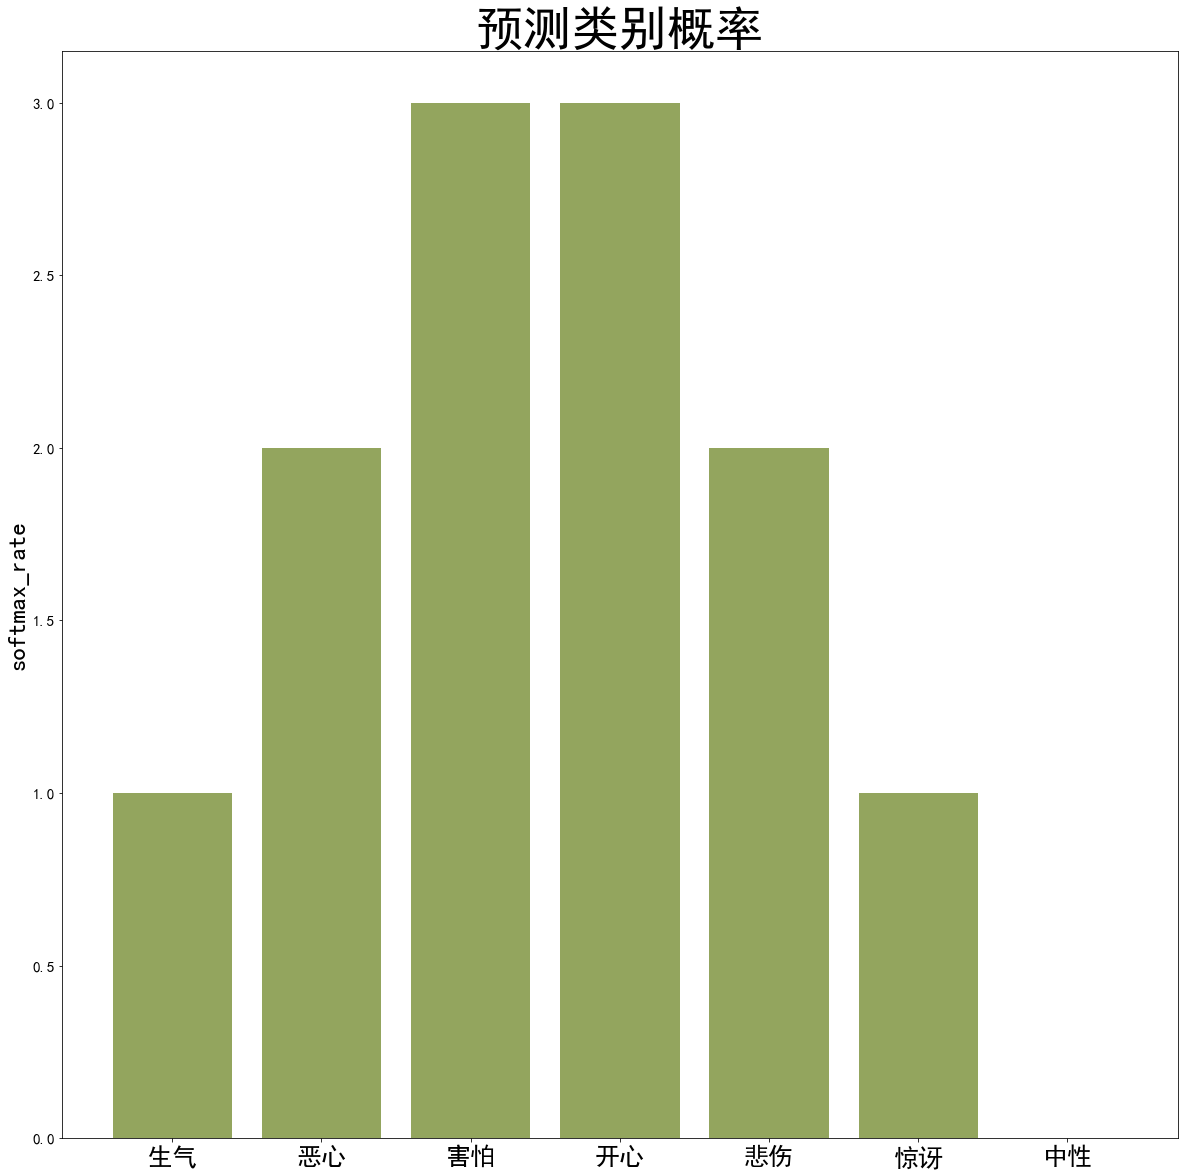

In [24]:
draw_bar_img(output_map, y, '../Saved_Virtualizations/test')